In [1]:
import pandas as pd
import pingouin as pg
from scipy.stats import mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Data Preparation

In [2]:
men_df = pd.read_csv("men_results.csv")
women_df = pd.read_csv("women_results.csv")

In [3]:
women_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [4]:
women_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [5]:
men_df['date'] = pd.to_datetime(men_df['date'])
women_df['date'] = pd.to_datetime(women_df['date'])

In [6]:
men_wc = men_df[(men_df['date'] > '2002-01-01') & (men_df['tournament'] == 'FIFA World Cup')]
women_wc = women_df[(women_df['date'] > '2002-01-01') & (women_df['tournament'] == 'FIFA World Cup')]

In [7]:
men_wc['gender'] = 'men'
women_wc['gender'] = 'women'

In [8]:
combined_df = pd.concat([men_wc, women_wc], axis=0, ignore_index=True)

In [9]:
combined_df['total_goals'] = combined_df['home_score'] + combined_df['away_score']

In [10]:
if 'Unnamed: 0' in combined_df.columns:
    combined_df = combined_df.drop(columns=['Unnamed: 0'])

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         584 non-null    datetime64[ns]
 1   home_team    584 non-null    object        
 2   away_team    584 non-null    object        
 3   home_score   584 non-null    int64         
 4   away_score   584 non-null    int64         
 5   tournament   584 non-null    object        
 6   gender       584 non-null    object        
 7   total_goals  584 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 36.6+ KB


In [12]:
combined_df.head()

,date,home_team,away_team,home_score,away_score,tournament,gender,total_goals
0,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


# Exploratory Data Analysis

## Summary Statistics

In [13]:
summary_stats = combined_df.groupby('gender')[['total_goals', 'home_score', 'away_score']].describe()
display(summary_stats)

total_goals                                               home_score  \
             count      mean       std  min  25%  50%  75%   max      count   
gender                                                                        
men          384.0  2.513021  1.652544  0.0  1.0  2.0  3.0   8.0      384.0   
women        200.0  2.980000  2.022387  0.0  2.0  3.0  4.0  13.0      200.0   

                                                  away_score            \
         mean       std  min  25%  50%  75%   max      count      mean   
gender                                                                   
men     1.375  1.328538  0.0  0.0  1.0  2.0   8.0      384.0  1.138021   
women   1.805  1.937977  0.0  1.0  1.0  2.0  13.0      200.0  1.175000   

                                           
             std  min  25%  50%  75%  max  
gender                                     
men     1.107398  0.0  0.0  1.0  2.0  7.0  
women   1.289453  0.0  0.0  1.0  2.0  7.0

## Goal Distribution

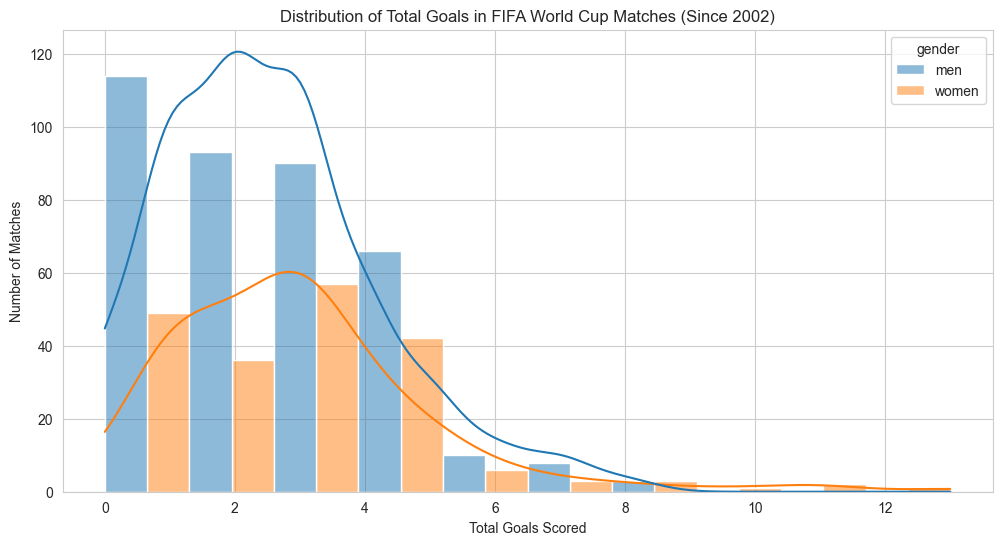

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='total_goals', hue='gender', multiple='dodge', kde=True, bins=10)
plt.title('Distribution of Total Goals in FIFA World Cup Matches (Since 2002)')
plt.xlabel('Total Goals Scored')
plt.ylabel('Number of Matches')
plt.show()

## Match Outcomes

In [15]:
def get_outcome(row):
    if row['home_score'] == row['away_score']:
        return 'Draw'
    elif row['home_score'] > row['away_score']:
        return 'Home Win'
    else:
        return 'Away Win'

combined_df['outcome'] = combined_df.apply(get_outcome, axis=1)

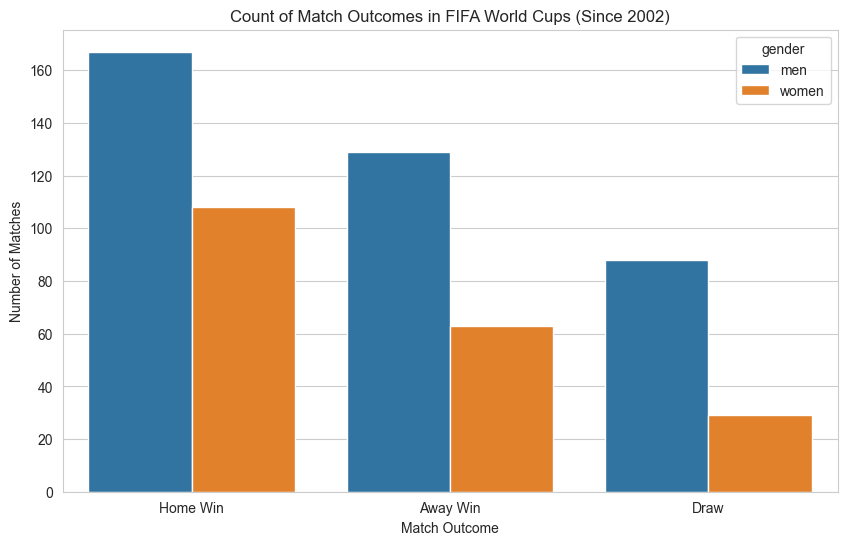

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='outcome', hue='gender', order=['Home Win', 'Away Win', 'Draw'])
plt.title('Count of Match Outcomes in FIFA World Cups (Since 2002)')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.show()

# Hypothesis Testing

In [ ]:
def interpret_hypothesis_test(p_value, alt_description, alpha=0.1):
    """
    General function to interpret hypothesis test results.

    Parameters:
    - p_value (float): The p-value from the test result.
    - alt_description (str): What the alternative hypothesis claims.
    - alpha (float, optional): Significance level (default is 0.1).
    """
    
    print(f"Significance Level (alpha): {alpha}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Result: Reject the null hypothesis (H₀).")
        print(f"Conclusion: There is significant evidence that {alt_description}.")
    else:
        print("Result: Fail to reject the null hypothesis (H₀).")
        print(f"Conclusion: There is not enough evidence to conclude that {alt_description}.")

### Hypothesis 1: Mean Total Goals

**Summary:**  
The mean total number of goals scored per match is greater in the **Women's World Cup** than in the **Men's World Cup**.

- **Null Hypothesis (H₀):** The mean total goals are the same in both tournaments.

- **Alternative Hypothesis (Hₐ):** The mean total goals are greater in the Women's World Cup.


In [18]:
women_total_goals = combined_df[combined_df['gender'] == 'women']['total_goals']
men_total_goals = combined_df[combined_df['gender'] == 'men']['total_goals']

In [19]:
h1_results = pg.mwu(x=women_total_goals, y=men_total_goals, alternative='greater')
p_val_h1 = h1_results['p-val'][0]

interpret_hypothesis_test(p_val_h1, "the mean total goals are greater in the Women's World Cup")

Significance Level (alpha): 0.1
P-value: 0.0051
Result: Reject the null hypothesis (H₀).
Conclusion: There is significant evidence that the mean total goals are greater in the Women's World Cup.


### Hypothesis 2: Frequency of Draws

**Summary:**  
The proportion of matches ending in a draw is different between the **Men's** and **Women's World Cups**.

- **Null Hypothesis (H₀):** The proportions are the same in both tournaments.

- **Alternative Hypothesis (Hₐ):** The proportions are different between the Men's and Women's World Cups.


In [20]:
contingency_table_h2 = pd.crosstab(combined_df['gender'], combined_df['outcome'])
contingency_table_h2

outcome,Away Win,Draw,Home Win
gender,,,
men,129,88,167
women,63,29,108


In [21]:
_, p_val_h2, _, _ = chi2_contingency(contingency_table_h2)

interpret_hypothesis_test(p_val_h2, "the proportion of draws is different between Men's and Women's World Cups")

Significance Level (alpha): 0.1
P-value: 0.0192
Result: Reject the null hypothesis (H₀).
Conclusion: There is significant evidence that the proportion of draws is different between Men's and Women's World Cups.


### Hypothesis 3: Mean Home Team Goals

**Summary:**  
The mean number of goals scored by the **home team** is different between the **Men's** and **Women's World Cups**.

- **Null Hypothesis (H₀):** The mean home goals scored is the same in both tournaments.

- **Alternative Hypothesis (Hₐ):** The mean home goals scored is different between the Men's and Women's World Cups.

In [22]:
women_home_goals = combined_df[combined_df['gender'] == 'women']['home_score']
men_home_goals = combined_df[combined_df['gender'] == 'men']['home_score']

In [23]:
h3_results = pg.mwu(x=women_home_goals, y=men_home_goals, alternative='two-sided')
p_val_h3 = h3_results['p-val'].values[0]

interpret_hypothesis_test(p_val_h3, "the mean number of goals scored by the home team is different between the Men's and Women's World Cups")

Significance Level (alpha): 0.1
P-value: 0.0148
Result: Reject the null hypothesis (H₀).
Conclusion: There is significant evidence that the mean number of goals scored by the home team is different between the Men's and Women's World Cups.


### Hypothesis 4: Mean Away Team Goals

**Summary:**  
The mean number of goals scored by the **away team** is greater in the **Women's World Cup** compared to the **Men's World Cup**.

- **Null Hypothesis (H₀):** The mean away goals scored is the same in both tournaments.

- **Alternative Hypothesis (Hₐ):** The mean away goals scored is greater in the Women's World Cup.

In [24]:
women_away_goals = combined_df[combined_df['gender'] == 'women']['away_score']
men_away_goals = combined_df[combined_df['gender'] == 'men']['away_score']

In [25]:
h4_results = pg.mwu(x=women_away_goals, y=men_away_goals, alternative='greater')
p_val_h4 = h4_results['p-val'].values[0]

interpret_hypothesis_test(p_val_h4, "the mean number of goals scored by the away team is greater in the Women's World Cup")

Significance Level (alpha): 0.1
P-value: 0.6398
esult: Fail to reject the null hypothesis (H₀).
Conclusion: There is not enough evidence to conclude that the mean number of goals scored by the away team is greater in the Women's World Cup.
